# Technical Indicators
Adding technical indicator values

### Importing Libraries and Data

In [8]:
import pandas as pd
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
df = pd.read_csv('BTC-USD.csv')

# Viewing the DF
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


### Datetime Conversion

In [10]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

## Charting Values

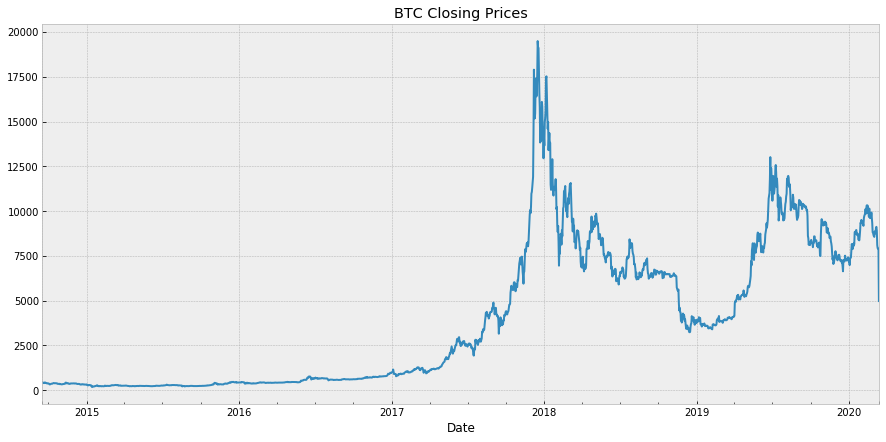

In [11]:
# Viewing the Chart of Closing Values
df['Close'].plot(figsize=(15,7), title='BTC Closing Prices');

## Creating the Technical Indicators

In [12]:
def SMA(df, periods=50):
    """
    Calculating the Simple Moving Average for the past n days
    
    **Values must be descending**
    """
    lst = []
        
    for i in range(len(df)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            # Calculating the SMA
            lst.append(round(np.mean(df[i:periods+i]), 2))
        
    return lst

In [13]:
def Stoch(closes, lows, highs, periods=14, d_periods=3):
    """
    Calculating the Stochastic Oscillator for the past n days
    
    **Values must be descending**
    """
    k_lst = []
    
    d_lst = []
    
    for i in range(len(closes)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            k_lst.append(np.nan)
            
            d_lst.append(np.nan)
            
        else:
            
            # Calculating the Stochastic Oscillator
            
            # Calculating the %K line
            highest = max(highs[i:periods+i])
            lowest = min(lows[i:periods+i])
            
            k = ((closes[i] - lowest) / (highest - lowest)) * 100
            
            k_lst.append(round(k, 2))
            
            # Calculating the %D line
            if len(k_lst) < d_periods:
                d_lst.append(np.nan)
            else:
                d_lst.append(round(np.mean(k_lst[-d_periods-1:-1])))
    
    return k_lst, d_lst
    

In [14]:
def RSI(df, periods=14):
    """
    Calculates the Relative Strength Index
    
    **Values must be descending**
    """
    
    df = df.diff()
    
    lst = []
    
    for i in range(len(df)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            
            # Calculating the Relative Strength Index          
            avg_gain = (sum([x for x in df[i:periods+i] if x >= 0]) / periods)
            avg_loss = (sum([abs(x) for x in df[i:periods+i] if x <= 0], .00001) / periods)

            rs = avg_gain / avg_loss

            rsi = 100 - (100 / (1 + rs))

            lst.append(round(rsi, 2))

            
    return lst

## Creating New Values and Plotting
Based on the Indicators

#### RSI Indicator

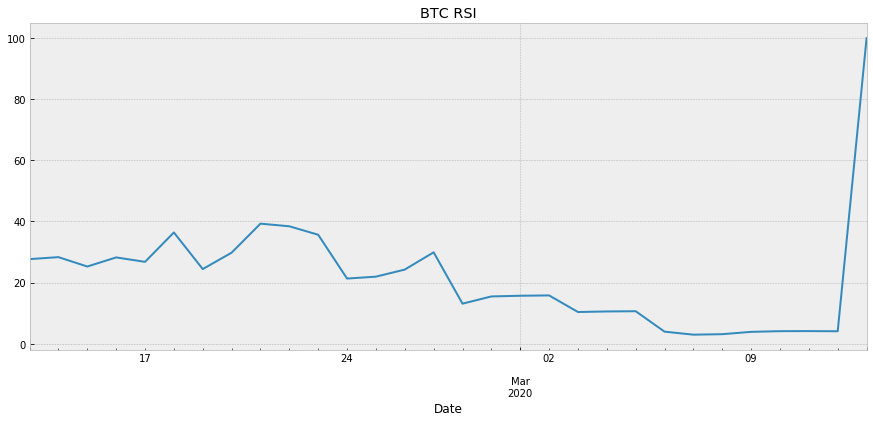

In [15]:
df['RSI'] = RSI(df.Close)

# Plotting
df['RSI'][-30:].plot(figsize=(15,6), title='BTC RSI');

#### Stochastic Oscillator

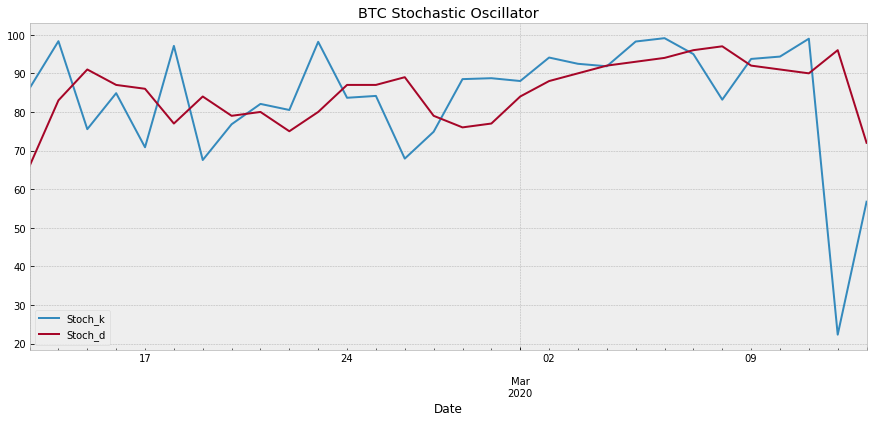

In [16]:
df['Stoch_k'], df['Stoch_d'] = Stoch(df.Close, df.Low, df.High)

# Plotting
df[-30:].plot(y=['Stoch_k', 'Stoch_d'], figsize=(15,6), title='BTC Stochastic Oscillator');

#### Simple Moving Average

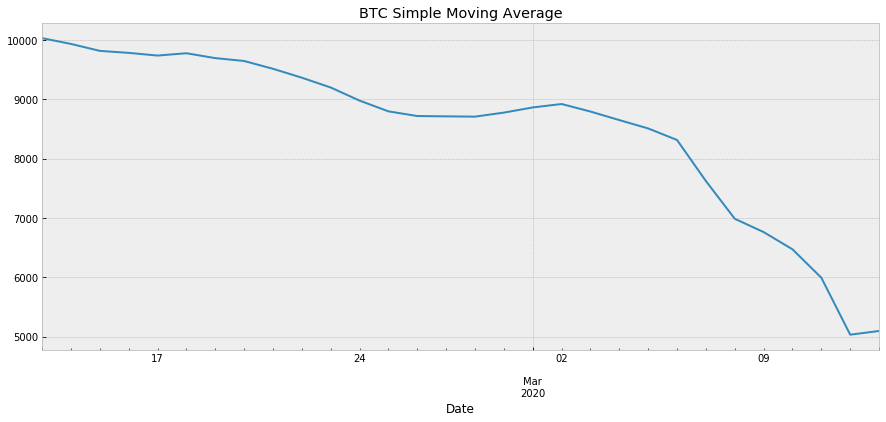

In [17]:
df['SMA'] = SMA(df.Close, 6)

# Plotting
df['SMA'][-30:].plot(figsize=(15,6), title='BTC Simple Moving Average');

In [18]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,RSI,Stoch_k,Stoch_d,SMA
Date,,,,,,,,,,
2020-03-04,8788.541992,8843.366211,8712.431641,8755.246094,8755.246094,34746706368,10.54,91.83,92.0,8649.71
2020-03-05,8760.285156,9142.054688,8757.253906,9078.762695,9078.762695,39698054597,10.62,98.24,93.0,8508.79
2020-03-06,9078.308594,9167.695313,9032.079102,9122.545898,9122.545898,40826885650,3.93,99.11,94.0,8314.24
2020-03-07,9121.600586,9163.220703,8890.744141,8909.954102,8909.954102,36216930369,2.94,94.98,96.0,7622.28
2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,8108.116211,39973102120,3.10,83.18,97.0,6986.47
2020-03-09,8111.146484,8177.793457,7690.098145,7923.644531,7923.644531,46936995808,3.86,93.73,92.0,6762.14
2020-03-10,7922.146973,8136.945313,7814.763184,7909.729492,7909.729492,42213940993,4.09,94.34,91.0,6471.76
2020-03-11,7910.089844,7950.814453,7642.812500,7911.430176,7911.430176,38682762604,4.11,98.97,90.0,5992.44
2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243,4.06,22.31,96.0,5032.95


## Using a Technical Analysis Python Library

In [19]:
# Importing Library
import ta

In [20]:
# TA's RSI
df['ta_rsi'] = ta.momentum.rsi(df.Close)

# TA's Stochastic Oscillator
df['ta_stoch_k'] = ta.momentum.stoch(df.High, df.Low, df.Close)
df['ta_stoch_d'] = ta.momentum.stoch_signal(df.High, df.Low, df.Close)

In [21]:
# Showing our own custom indicators plus the libraries
df.drop(df.columns[:6], axis=1).tail(10)

,RSI,Stoch_k,Stoch_d,SMA,ta_rsi,ta_stoch_k,ta_stoch_d
Date,,,,,,,
2020-03-04,10.54,91.83,92.0,8649.71,40.014444,19.184521,20.248288
2020-03-05,10.62,98.24,93.0,8508.79,47.501065,41.035878,26.206956
2020-03-06,3.93,99.11,94.0,8314.24,48.438964,43.993137,34.737846
2020-03-07,2.94,94.98,96.0,7622.28,44.300509,29.634000,38.221005
2020-03-08,3.10,83.18,97.0,6986.47,32.887521,0.155066,24.594068
2020-03-09,3.86,93.73,92.0,6762.14,30.914291,11.899609,13.896225
2020-03-10,4.09,94.34,91.0,6471.76,30.764346,13.193606,8.416094
2020-03-11,4.11,98.97,90.0,5992.44,30.808518,17.615627,14.236281
2020-03-12,4.06,22.31,96.0,5032.95,14.080537,2.563857,11.124364


### Using only the TA library's Indicators
Dropping our own custom indicators

In [25]:
df.drop(df.columns[6:], axis=1, inplace=True)

In [40]:
# Adding all the indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

In [42]:
# Dropping everything else besides 'Close' and the Indicators
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)
df

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,457.334015,-7.924336e+06,21056800,-0.376331,0.000000e+00,0.000000,0.000000,-1.422178e+07,1000.000000,0.000000,...,50.000000,31.183428,31.183428,-68.816572,0.000000,457.334015,0.000000,-88.414661,0.000000,0.000000
2014-09-18,424.440002,-2.454020e+07,-13426400,-0.441847,-1.134291e+09,-3212.366691,-3212.366691,-2.109752e+07,1000.000000,0.000000,...,50.000000,20.584704,25.884066,-79.415296,0.000000,424.440002,0.000000,-7.192558,-7.464335,-7.192558
2014-09-19,394.795990,-4.448391e+07,-51346100,-0.475969,-1.132834e+09,-3288.687640,-3250.527166,-5.128636e+06,1000.000000,0.000000,...,50.000000,12.271320,21.346484,-87.728680,0.000000,394.795990,0.000000,-6.984264,-7.240151,-13.674475
2014-09-20,408.903992,-3.937687e+07,-14482500,-0.302148,-8.967045e+08,36.798834,-2154.751832,-1.331094e+06,1035.734917,0.000000,...,50.000000,29.138447,20.664824,-70.861553,0.000000,408.903992,0.000000,3.573492,3.511124,-10.589639
2014-09-21,398.821014,-5.037763e+07,-41062600,-0.321074,-8.068905e+08,-274.120355,-1684.593963,6.618911e+05,1010.195200,0.000000,...,50.000000,17.083524,19.497764,-82.916476,0.000000,398.821014,0.000000,-2.465855,-2.496766,-12.794369
2014-09-22,402.152008,-4.974146e+07,-16935000,-0.274768,-6.801392e+08,-31.656617,-1354.006494,-4.539104e+05,1018.632454,0.000000,...,50.000000,21.065966,22.429312,-78.934034,-8.296951,402.152008,0.000000,0.835210,0.831742,-12.066019
2014-09-23,435.790985,-1.610777e+07,28164500,-0.071232,-3.662477e+08,1695.136068,-845.816067,3.973973e+06,1018.632454,0.000000,...,50.000000,61.283773,33.144421,-38.716227,-11.527058,435.790985,0.000000,8.364742,8.033259,-4.710568
2014-09-24,423.204987,-3.825869e+07,-2463200,-0.149007,-3.689952e+08,476.627823,-656.895511,2.887904e+06,989.213520,0.000000,...,50.000000,46.236311,42.862017,-53.763689,-8.264314,423.204987,0.000000,-2.888081,-2.930607,-7.462604
2014-09-25,411.574005,-5.703557e+07,-29277600,-0.201132,-3.608356e+08,-635.564367,-654.229118,-1.621496e+06,962.026873,0.000000,...,50.000000,32.330638,46.616907,-67.669362,-5.888602,411.574005,0.000000,-2.748309,-2.786782,-10.005818


In [ ]:
df